In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread("akram.png")
temp_img = img.copy()
gray_scale_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2GRAY)
gray_scale_img_np = np.asarray(gray_scale_img).astype(np.float64)


In [12]:
def F(a, b):
    if a*b > 0:
        return "0"
    elif a*b <= 0:
        return "1"


In [3]:
def I(picture, h, w, theta):
    if (theta == 0):
        return picture[h,w] - picture[h,w+1]
    elif (theta == 45):
        return picture[h, w] - picture[h-1, w+1]
    elif (theta == 90):
        return picture[h, w] - picture[h-1, w]
    elif (theta == 135):
        return picture[h, w] - picture[h-1, w-1]


In [4]:
def ldp_pixel(picture, h, w):  # calculating local derivative pattern value of a pixel
    eigth_bit_binary = []
    four_decimal_val = []
    decimal_val = 0
    angles = [0, 45, 90, 135]

    for theta in angles:

        # starting from top left,assigning bit to pixels clockwise at theta degree
        eigth_bit_binary.append(
            F(I(picture, h, w, theta), I(picture, h-1, w-1, theta)))

        eigth_bit_binary.append(
            F(I(picture, h, w, theta), I(picture, h-1, w, theta)))

        eigth_bit_binary.append(
            F(I(picture, h, w, theta), I(picture, h-1, w+1, theta)))

        eigth_bit_binary.append(
            F(I(picture, h, w, theta), I(picture, h, w+1, theta)))

        eigth_bit_binary.append(
            F(I(picture, h, w, theta), I(picture, h+1, w+1, theta)))

        eigth_bit_binary.append(
            F(I(picture, h, w, theta), I(picture, h+1, w, theta)))

        eigth_bit_binary.append(
            F(I(picture, h, w, theta), I(picture, h+1, w-1, theta)))

        eigth_bit_binary.append(
            F(I(picture, h, w, theta), I(picture, h, w-1, theta)))

        l = "".join(eigth_bit_binary)
        decimal_val = int(l, 2)
        four_decimal_val.append(decimal_val)
        eigth_bit_binary = []

    return four_decimal_val


In [5]:
def ldp_img(img):
    m, n = img.shape
    # converting image to grayscale
    # ldp_photo = np.zeros((m, n),np.uint8)
    ldp_img = np.zeros((m, n, 4))
    # converting image to ldp
    for i in range(2, m-2):
        for j in range(2, n-2):
            ldp_img[i, j, 0] = ldp_pixel(img, i, j)[0]
            ldp_img[i, j, 1] = ldp_pixel(img, i, j)[1]
            ldp_img[i, j, 2] = ldp_pixel(img, i, j)[2]
            ldp_img[i, j, 3] = ldp_pixel(img, i, j)[3]

    return ldp_img


In [13]:
ldp_paper = ldp_img(gray_scale_img_np)


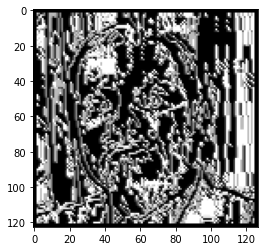

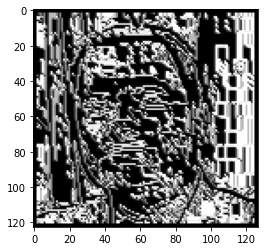

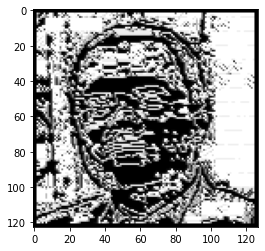

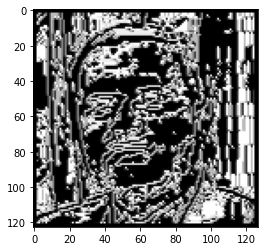

(123, 127, 4)

In [14]:
plt.imshow(ldp_paper[:, :, 0], cmap="gray")
plt.show()
plt.imshow(ldp_paper[:, :, 1], cmap="gray")
plt.show()
plt.imshow(ldp_paper[:, :, 2], cmap="gray")
plt.show()
plt.imshow(ldp_paper[:, :, 3], cmap="gray")
plt.show()
ldp_paper.shape


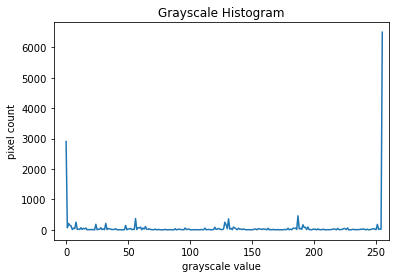

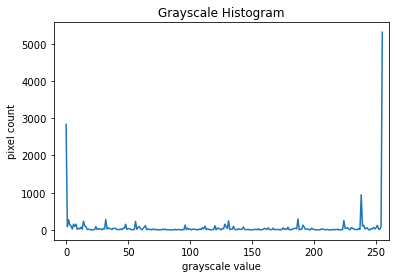

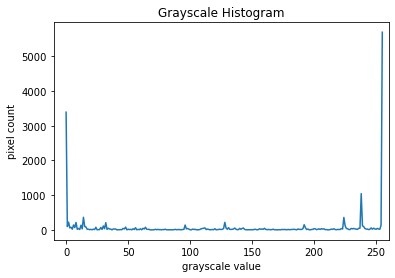

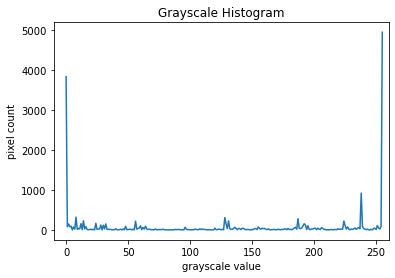

In [33]:
histogram, bin_edges = np.histogram(
    ldp_paper[:, :, 0], bins=256, range=(0, 256))
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixel count")
plt.xlim([-10, 260])
plt.plot(bin_edges[0:-1], histogram)  # <- or here

histogram, bin_edges = np.histogram(
    ldp_paper[:, :, 1], bins=256, range=(0, 256))
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixel count")
plt.xlim([-10, 260])
plt.plot(bin_edges[0:-1], histogram)  # <- or here

histogram, bin_edges = np.histogram(
    ldp_paper[:, :, 2], bins=256, range=(0, 256))
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixel count")
plt.xlim([-10, 260])
plt.plot(bin_edges[0:-1], histogram)  # <- or here

histogram, bin_edges = np.histogram(
    ldp_paper[:, :, 3], bins=256, range=(0, 256))
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixel count")
plt.xlim([-10, 260])
plt.plot(bin_edges[0:-1], histogram)  # <- or here


In [32]:
ldp_paper[:, :, 0].shape


(122, 146)